## Warmup for Week 7 : Unsupervised Machine Learning Review 

Datasets: Provide to the class, student-mat.csv

Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).
For information on variables see: https://archive.ics.uci.edu/ml/datasets/student+performance

Objective: 
1) Cluster the students to see if there are some natural groupings using Kmeans.
2) Use PCA to plot the clusters.

You may find these 2 sites helpful in your analysis.
#https://stackoverflow.com/questions/42196589/any-way-to-get-mappings-of-a-label-encoder-in-python-pandas
#https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type/22475141


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

Load and Explore data

In [8]:
df = pd.read_csv("student-mat.csv", sep=';')
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


Preprocess Data


In [9]:
# Encode categorical variables
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Standardize features (excluding grades)
features = df.drop(['G1', 'G2', 'G3'], axis=1)
scaled_features = StandardScaler().fit_transform(features)

Applying K-means

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters


using PCA for visualization

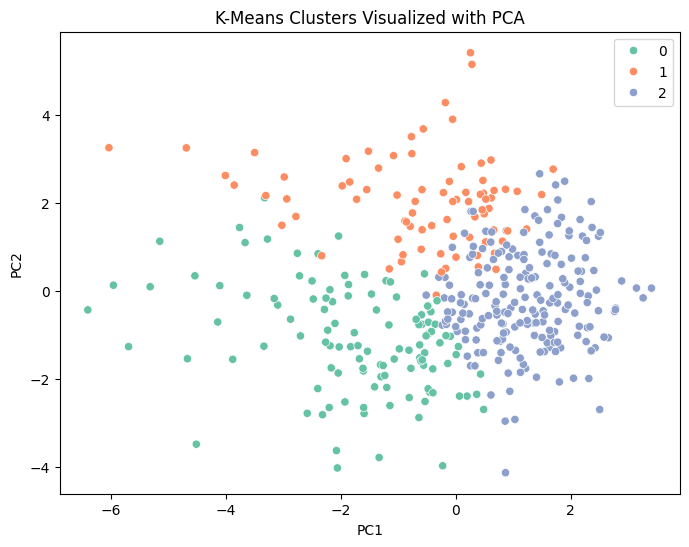

In [11]:
# Apply PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='Set2')
plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [12]:
# Check cluster assignments
print("Cluster distribution:")
print(df['Cluster'].value_counts().sort_index())
print(f"\nVariance explained by 2 PCs: {pca.explained_variance_ratio_.sum():.2%}")

Cluster distribution:
Cluster
0    115
1     80
2    200
Name: count, dtype: int64

Variance explained by 2 PCs: 18.59%
